In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


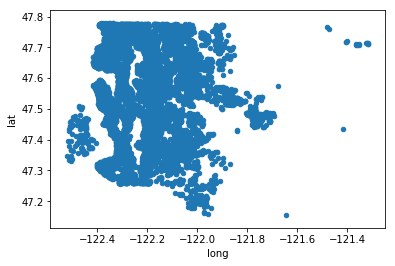

In [182]:
%matplotlib inline

df.plot.scatter('long', 'lat')
plt.show()

In [212]:
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].isna().sum()

df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.loc[df['yr_renovated'] != 0, 'yr_renovated'] = 1

df['view'] = df['view'].fillna(0)
df['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Decided to leverage 'zipcode'; hence, dropped 'lat' and 'long'.

Dropped 'id' because it wasn't meaningful for our purposes.

Dropped 'date' because it was not meaningfully varied (all dates between 2014 & 2015).

In [213]:
df = df.drop(columns=['lat', 'long', 'id', 'date'], axis=1)

Addressed presence of '?' in 'sqft_basement'; changed the datatype.

In [38]:
#df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value='0').astype(str).astype(float).astype(int)

In [4]:
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

Dropped 'sqft_basement' because it was a zero-inflated variable, which would be challenging to work with for very little reward.

In [214]:
df = df.drop(columns=['sqft_basement'], axis=1)

In [136]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,0.117543,-0.053402,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,0.017635,-0.154092,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,0.046742,-0.204786,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,0.050829,-0.199802,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,0.005091,-0.129586,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,0.003713,-0.059541,0.280102,-0.010722
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.074267,0.028923,0.083823,0.030658
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.090480,0.085059,0.278928,0.073083
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,-0.055383,0.002888,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.447865,0.015259,-0.185771,0.713867,0.120981


Dropped 'sqft_above', 'bathrooms', 'grade', 'sqft_living15' for colinearity with 'sqft_living' [used a .75 threshhold].

In [215]:
df_dropped = df.drop(columns=['sqft_above', 'sqft_living15', 'bathrooms', 'grade'], axis=1)

Dropped 1.3% of data (284 observations out of 21,597). A number of a outliers and top-end influencers that were impacting different independent variables.

In [216]:
indexNames = df_dropped[df_dropped['sqft_living'] >= 5000].index
df_dropped.drop(indexNames, inplace=True)

indexNames2 = df_dropped[df_dropped['bedrooms'] >= 8].index
df_dropped.drop(indexNames2, inplace=True)

indexNames3 = df_dropped[df_dropped['sqft_lot'] > 400000].index
df_dropped.drop(indexNames3, inplace=True)

indexNames4 = df_dropped[df_dropped['floors'] > 3.0].index
df_dropped.drop(indexNames4, inplace=True)

df_dropped.shape

(21313, 12)

In [141]:
df_dropped.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,sqft_lot15
price,1.000000,0.301720,0.658674,0.076871,0.258218,0.228351,0.381349,0.050724,0.040137,0.123276,-0.039223,0.060409
bedrooms,0.301720,1.000000,0.601117,0.041104,0.174992,-0.012270,0.063998,0.027958,0.165418,0.015052,-0.158621,0.028090
sqft_living,0.658674,0.601117,1.000000,0.180898,0.355343,0.068717,0.243786,-0.055257,0.329830,0.050592,-0.200616,0.161346
sqft_lot,0.076871,0.041104,0.180898,1.000000,-0.027852,0.024228,0.055470,-0.013527,0.061600,0.009105,-0.151817,0.788186
floors,0.258218,0.174992,0.355343,-0.027852,1.000000,0.014193,0.015799,-0.264831,0.491718,0.003607,-0.058485,-0.027392
waterfront,0.228351,-0.012270,0.068717,0.024228,0.014193,1.000000,0.372157,0.018975,-0.029486,0.072904,0.031220,0.035129
view,0.381349,0.063998,0.243786,0.055470,0.015799,0.372157,1.000000,0.048905,-0.066477,0.092743,0.095444,0.052479
condition,0.050724,0.027958,-0.055257,-0.013527,-0.264831,0.018975,0.048905,1.000000,-0.360061,-0.055690,0.000384,-0.000425
yr_built,0.040137,0.165418,0.329830,0.061600,0.491718,-0.029486,-0.066477,-0.360061,1.000000,-0.201839,-0.345161,0.066029
yr_renovated,0.123276,0.015052,0.050592,0.009105,0.003607,0.072904,0.092743,-0.055690,-0.201839,1.000000,0.062929,0.004381


Dropped 'sqft_lot15' because of colinearity concerns with 'sqft_lot'.

In [217]:
df_dropped.drop(columns=['sqft_lot15'], axis=1, inplace=True)

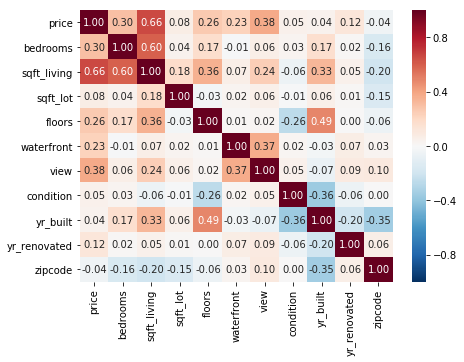

In [218]:
import seaborn as sns
#sns.heatmap(df_dropped.corr(), center=0);
correlation = df_dropped.corr()
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(correlation, annot=True, fmt = '.2f', linewidths=0, vmin=-1, cmap="RdBu_r")

In [342]:
#decade = ["{0}".format(year, year + 10) for year in range(1900, 2030, 10)]
#count_unique_decade = len(decade)

In [145]:
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,1955,0.0,98178
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,1951,1.0,98125
2,180000.0,2,770,10000,1.0,0.0,0.0,3,1933,0.0,98028
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,1965,0.0,98136
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,1987,0.0,98074


In [72]:
#df_dropped['decade_built'] = pd.cut(x=df_dropped['yr_built'], bins=count_unique_decade, labels=decade)
df_dropped.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode
0,221900.0,3,1180,5650,1.0,0.0,0.0,3,1955,0.0,98178
1,538000.0,3,2570,7242,2.0,0.0,0.0,3,1951,1.0,98125
2,180000.0,2,770,10000,1.0,0.0,0.0,3,1933,0.0,98028
3,604000.0,4,1960,5000,1.0,0.0,0.0,5,1965,0.0,98136
4,510000.0,3,1680,8080,1.0,0.0,0.0,3,1987,0.0,98074


In [344]:
#df_dropped['decade_built'].astype(str).astype(float).head(2)

0    1960.0
1    1950.0
Name: decade_built, dtype: float64

In [345]:
#df_dropped.drop(columns=['yr_built'], axis=1, inplace=True)

Created dummy variables for 'yr_built', 'condition', and 'zipcode'.

In [219]:
#grade_dummies = pd.get_dummies(df_dropped['grade'], prefix="gd")
zip_dummies = pd.get_dummies(df_dropped['zipcode'], prefix="zp")
#decade_dummies = pd.get_dummies(df_dropped['decade_built'], prefix="dec")
year_dummies = pd.get_dummies(df_dropped['yr_built'], prefix="yr")
condition_dummies = pd.get_dummies(df_dropped['condition'], prefix="cond")
#floors_dummies = pd.get_dummies(df_dropped['floors'], prefix="floor")
#view_dummies = pd.get_dummies(df_dropped['view'], prefix="view")

df_dropped = df_dropped.drop(['zipcode', 'yr_built', 'condition'], axis=1)

df_dropped = pd.concat([df_dropped, zip_dummies, year_dummies, condition_dummies], axis=1)
df_dropped.head(2)

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_renovated,zp_98001,zp_98002,...,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,cond_1,cond_2,cond_3,cond_4,cond_5
0,221900.0,3,1180,5650,1.0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2570,7242,2.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0


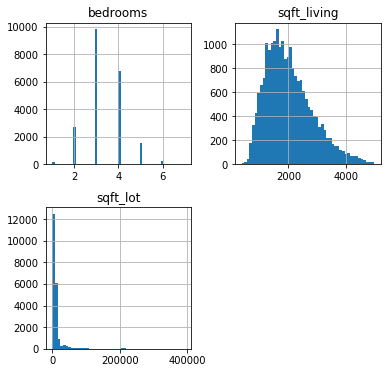

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

df_dropped[["sqft_living", "sqft_lot", "bedrooms"]].hist(bins=50, figsize  = [6, 6])
plt.show()

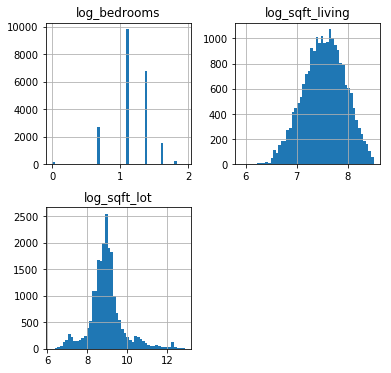

In [220]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data_log = pd.DataFrame([])
data_log["log_sqft_living"] = np.log(df_dropped["sqft_living"])
data_log["log_sqft_lot"] = np.log(df_dropped["sqft_lot"])
#data_log["log_floors"] = np.log(df_dropped['floors'])
data_log["log_bedrooms"] = np.log(df_dropped["bedrooms"])
data_log.hist(bins=50, figsize  = [6, 6]);

Transformed 'sqft_living', 'sqft_lot' & 'bedrooms' to bring these features more in line with normal distribution.

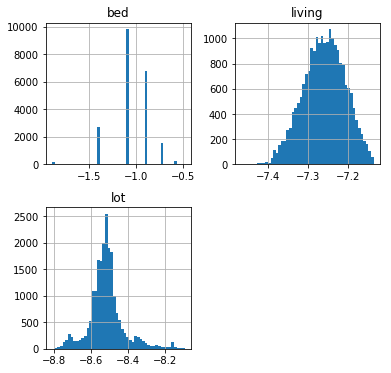

In [221]:
logbed = data_log["log_bedrooms"]
logsqftliving = data_log["log_sqft_living"]
logsqftlot = data_log["log_sqft_lot"]
#logfloors = data_log["log_floors"]

#Standardized using mean normalization
#Standardized using median & .75-.25 quartile normalization
#scaled_bed = (logbed-np.median(logbed))/(logbed.quantile(.75))-(logbed.quantile(.25))
#scaled_sqft_living = (logsqftliving-np.median(logsqftliving))/(logsqftliving.quantile(.75))-(logsqftliving.quantile(.25))
#scaled_sqft_lot = (logsqftlot-np.median(logsqftlot))/(logsqftlot.quantile(.75))-(logsqftlot.quantile(.25))
scaled_bed = (logbed-np.mean(logbed))/(max(logbed))-(min(logbed))
scaled_sqft_living = (logsqftliving-np.mean(logsqftliving))/(max(logsqftliving))-(min(logsqftliving))
scaled_sqft_lot = (logsqftlot-np.mean(logsqftlot))/(max(logsqftlot))-(min(logsqftlot))
#scaled_floors = (logfloors-np.mean(logfloors))/(max(logfloors)-min(logfloors))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled["bed"]= scaled_bed
data_cont_scaled["living"]= scaled_sqft_living
data_cont_scaled["lot"] = scaled_sqft_lot
#data_cont_scaled["floors"] = scaled_floors

data_cont_scaled.hist(bins=50, figsize  = [6, 6]);

In [222]:
df_dropped['bedrooms'] = data_cont_scaled["bed"]
df_dropped['sqft_living'] = data_cont_scaled["living"]
df_dropped['sqft_lot'] = data_cont_scaled["lot"]
#df_dropped['floors'] = data_cont_scaled["floors"]

In [223]:
df_dropped['log_price'] = np.log(df_dropped['price'])

In [224]:
df_dropped.drop(columns=['price'], axis=1, inplace=True)

In [225]:
df_dropped.head(3)

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_renovated,zp_98001,zp_98002,zp_98003,...,yr_2012,yr_2013,yr_2014,yr_2015,cond_1,cond_2,cond_3,cond_4,cond_5,log_price
0,-1.098612,-7.319232,-8.553661,1.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,12.309982
1,-1.098612,-7.219846,-8.526851,2.0,0.0,0.0,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,13.195614
2,-1.391094,-7.373736,-8.492000,1.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,12.100712


In [261]:
#import pandas as pd
#from sklearn import preprocessing

#float_array = df_dropped['sqft_living'].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(float_array)
#df_normalized = pd.DataFrame(np_scaled)
#df_normalized.head()

In [226]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [11]:
#formula = "price ~ sqft_living+floors+bedrooms+sqft_living15"
#model = ols(formula= formula, data=df_dropped).fit()

In [227]:
outcome = 'log_price'
predictors = df_dropped.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [228]:
model = ols(formula= formula, data=df_dropped).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     657.9
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:11:25   Log-Likelihood:                 5030.5
No. Observations:               21313   AIC:                            -9669.
Df Residuals:                   21117   BIC:                            -8108.
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.6283      0.242    184.479      0.000      44.154      45.102
bedrooms        -0.0861      0.009     -9.497      0.000      -0.104      -0.068
sqft_living      4.7026      0.043    108.908      0.000       4.618       4.787
sqft_lot         0.8946      0.022     40.960      0.000       0.852       0.937
floors           0.0078      0.004      2.069      0.039       0.000       0.015
waterfront       0.4467      0.019     23.672      0.000       0.410       0.484
view             0.0870      0.002     41.969      0.000       0.083       0.091
yr_renovated     0.0762      0.008      9.851      0.000       0.061       0.091
zp_98001         0.1082      0.011     10.009      0.000       0.087       0.129
zp_98002         0.0878      0.014      6.152      0.000       0.060       0.116
zp_98003         0.1825      0.012     15.020      0.000       0.159       0.206
zp_98004         1.3679      0.012    118.184      0.000       1.345       1.391
zp_98005         0.9971      0.015     65.756      0.000       0.967       1.027
zp_98006         0.8891      0.009     93.840      0.000       0.871       0.908
zp_98007         0.8884      0.017     53.607      0.000       0.856       0.921
zp_98008         0.8642      0.012     70.306      0.000       0.840       0.888
zp_98010         0.3111      0.020     15.849      0.000       0.273       0.350
zp_98011         0.6153      0.014     43.691      0.000       0.588       0.643
zp_98014         0.3466      0.018     19.125      0.000       0.311       0.382
zp_98019         0.3959      0.014     27.449      0.000       0.368       0.424
zp_98022         0.1055      0.014      7.731      0.000       0.079       0.132
zp_98023         0.1484      0.010     15.573      0.000       0.130       0.167
zp_98024         0.4887      0.022     21.827      0.000       0.445       0.533
zp_98027         0.6804      0.010     67.549      0.000       0.661       0.700
zp_98028         0.5690      0.012     47.953      0.000       0.546       0.592
zp_98029         0.7993      0.012     68.672      0.000       0.776       0.822
zp_98030         0.1717      0.013     13.609      0.000       0.147       0.196
zp_98031         0.2158      0.012     17.497      0.000       0.192       0.240
zp_98032         0.1433      0.018      8.112      0.000       0.109       0.178
zp_98033         0.9791      0.010     99.250      0.000       0.960       0.998
zp_98034         0.7246      0.009     78.140      0.000       0.706       0.743
zp_98038         0.2669      0.009     29.750      0.000       0.249       0.285
zp_98039         1.5895      0.029     54.005      0.000       1.532       1.647
zp_98040         1.1632      0.012     95.085      0.000       1.139       1.187
zp_98042         0.1906      0.009     20.593      0.000       0.173       0.209
zp_98

In [229]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_dropped, test_size=0.25)

In [35]:
len(train)

15984

In [36]:
len(test)

5329

In [230]:
outcome = 'log_price'
predictors = train.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [231]:
model = ols(formula= formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     494.1
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:11:43   Log-Likelihood:                 3836.9
No. Observations:               15984   AIC:                            -7282.
Df Residuals:                   15788   BIC:                            -5777.
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.5871      0.279    159.959      0.000      44.041      45.133
bedrooms        -0.0878      0.011     -8.344      0.000      -0.108      -0.067
sqft_living      4.6890      0.050     94.293      0.000       4.592       4.786
sqft_lot         0.9031      0.025     35.805      0.000       0.854       0.953
floors           0.0051      0.004      1.183      0.237      -0.003       0.014
waterfront       0.4527      0.023     19.716      0.000       0.408       0.498
view             0.0866      0.002     35.970      0.000       0.082       0.091
yr_renovated     0.0705      0.009      7.865      0.000       0.053       0.088
zp_98001         0.1191      0.012      9.583      0.000       0.095       0.144
zp_98002         0.0879      0.017      5.243      0.000       0.055       0.121
zp_98003         0.1823      0.014     12.990      0.000       0.155       0.210
zp_98004         1.3499      0.014     99.956      0.000       1.323       1.376
zp_98005         0.9899      0.017     57.744      0.000       0.956       1.023
zp_98006         0.8813      0.011     81.684      0.000       0.860       0.902
zp_98007         0.8826      0.019     46.100      0.000       0.845       0.920
zp_98008         0.8659      0.014     61.475      0.000       0.838       0.894
zp_98010         0.3162      0.022     14.308      0.000       0.273       0.360
zp_98011         0.6168      0.016     38.424      0.000       0.585       0.648
zp_98014         0.3419      0.020     16.804      0.000       0.302       0.382
zp_98019         0.3977      0.016     24.565      0.000       0.366       0.429
zp_98022         0.1017      0.016      6.298      0.000       0.070       0.133
zp_98023         0.1513      0.011     13.600      0.000       0.129       0.173
zp_98024         0.4730      0.026     18.117      0.000       0.422       0.524
zp_98027         0.6767      0.012     57.858      0.000       0.654       0.700
zp_98028         0.5677      0.013     42.254      0.000       0.541       0.594
zp_98029         0.7997      0.013     59.565      0.000       0.773       0.826
zp_98030         0.1679      0.014     11.808      0.000       0.140       0.196
zp_98031         0.2217      0.014     15.671      0.000       0.194       0.249
zp_98032         0.1472      0.020      7.210      0.000       0.107       0.187
zp_98033         0.9905      0.011     88.252      0.000       0.969       1.013
zp_98034         0.7281      0.011     68.038      0.000       0.707       0.749
zp_98038         0.2658      0.010     25.671      0.000       0.245       0.286
zp_98039         1.5902      0.034     47.164      0.000       1.524       1.656
zp_98040         1.1690      0.014     83.109      0.000       1.141       1.197
zp_98042         0.1901      0.011     17.708      0.000       0.169       0.211
zp_98

In [232]:
model = ols(formula= formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     166.6
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:11:52   Log-Likelihood:                 1318.9
No. Observations:                5329   AIC:                            -2246.
Df Residuals:                    5133   BIC:                            -955.9
Df Model:                         195                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.7966      0.493     90.775      0.000      43.829      45.764
bedrooms        -0.0758      0.018     -4.170      0.000      -0.111      -0.040
sqft_living      4.7316      0.088     53.655      0.000       4.559       4.905
sqft_lot         0.8869      0.044     20.046      0.000       0.800       0.974
floors           0.0179      0.008      2.312      0.021       0.003       0.033
waterfront       0.4418      0.034     13.013      0.000       0.375       0.508
view             0.0870      0.004     21.042      0.000       0.079       0.095
yr_renovated     0.0896      0.016      5.732      0.000       0.059       0.120
zp_98001         0.0714      0.022      3.230      0.001       0.028       0.115
zp_98002         0.0923      0.028      3.355      0.001       0.038       0.146
zp_98003         0.1783      0.025      7.270      0.000       0.130       0.226
zp_98004         1.4171      0.023     62.726      0.000       1.373       1.461
zp_98005         1.0246      0.033     31.279      0.000       0.960       1.089
zp_98006         0.9198      0.020     46.186      0.000       0.881       0.959
zp_98007         0.9082      0.033     27.385      0.000       0.843       0.973
zp_98008         0.8604      0.025     33.990      0.000       0.811       0.910
zp_98010         0.2917      0.043      6.795      0.000       0.208       0.376
zp_98011         0.6117      0.029     20.772      0.000       0.554       0.669
zp_98014         0.3575      0.040      8.878      0.000       0.279       0.436
zp_98019         0.3814      0.032     11.929      0.000       0.319       0.444
zp_98022         0.1149      0.026      4.427      0.000       0.064       0.166
zp_98023         0.1404      0.019      7.544      0.000       0.104       0.177
zp_98024         0.5201      0.044     11.790      0.000       0.434       0.607
zp_98027         0.6899      0.020     34.503      0.000       0.651       0.729
zp_98028         0.5728      0.025     22.482      0.000       0.523       0.623
zp_98029         0.7992      0.023     34.122      0.000       0.753       0.845
zp_98030         0.1833      0.027      6.666      0.000       0.129       0.237
zp_98031         0.1958      0.025      7.732      0.000       0.146       0.245
zp_98032         0.1272      0.035      3.584      0.000       0.058       0.197
zp_98033         0.9394      0.021     45.130      0.000       0.899       0.980
zp_98034         0.7108      0.019     37.821      0.000       0.674       0.748
zp_98038         0.2691      0.018     14.889      0.000       0.234       0.305
zp_98039         1.6046      0.061     26.397      0.000       1.485       1.724
zp_98040         1.1468      0.025     45.775      0.000       1.098       1.196
zp_98042         0.1942      0.018     10.515      0.000       0.158       0.230
zp_98

In [35]:
y = df_dropped['price']
X = df_dropped.drop('price', axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17050 4263 17050 4263


In [38]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [40]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 28595916066.275013
Test Mean Squarred Error: 30644112585.244194
